In [2]:
import tensorflow as tf 
import numpy as np 
from matplotlib import pyplot as plt
import sys, time, imageio, h5py, skimage, glob, os, shutil

In [3]:
# overwrite anyway 
if os.path.isdir('dataset'): 
    shutil.rmtree('dataset')
os.mkdir('dataset') # to save temp output

!wget -O dataset/demo-dataset.h5 https://raw.githubusercontent.com/AIScienceTutorial/Denoising/main/dataset/demo-dataset.h5

--2020-11-30 16:01:26--  https://raw.githubusercontent.com/AIScienceTutorial/Denoising/main/dataset/demo-dataset.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71307264 (68M) [application/octet-stream]
Saving to: ‘dataset/demo-dataset.h5’

dataset/demo-datase 100%[===================>]  68.00M  11.2MB/s    in 5.0s    

2020-11-30 16:01:31 (13.6 MB/s) - ‘dataset/demo-dataset.h5’ saved [71307264/71307264]



In [4]:
with h5py.File('dataset/demo-dataset.h5', 'r') as h5fd:
    ns_img_test = h5fd['test_ns'][:]
    gt_img_test = h5fd['test_gt'][:]

In [17]:
# overwrite anyway 
if os.path.isdir('model'): 
    shutil.rmtree('model')
os.mkdir('model') # to save temp output

!wget -O model/dn-mdl-toy.h5 https://raw.githubusercontent.com/AIScienceTutorial/Denoising/main/model/dn-mdl-toy.h5
!wget -O model/TomoGAN-toy.h5 https://raw.githubusercontent.com/AIScienceTutorial/Denoising/main/model/TomoGAN-toy.h5

--2020-11-30 16:32:26--  https://raw.githubusercontent.com/AIScienceTutorial/Denoising/main/model/dn-mdl-toy.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32888 (32K) [application/octet-stream]
Saving to: ‘model/dn-mdl-toy.h5’

model/dn-mdl-toy.h5 100%[===================>]  32.12K  --.-KB/s    in 0.009s  

2020-11-30 16:32:26 (3.42 MB/s) - ‘model/dn-mdl-toy.h5’ saved [32888/32888]

--2020-11-30 16:32:26--  https://raw.githubusercontent.com/AIScienceTutorial/Denoising/main/model/TomoGAN-toy.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2854736 (2.7M) [application/octet-stream]
Saving to: ‘model/TomoGA

In [6]:
trained_dn_mdl = tf.keras.models.load_model('model/dn-mdl-toy.h5', )
trained_dn_mdl.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 1)]   0         
_________________________________________________________________
conv2d (Conv2D)              (None, None, None, 8)     80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 16)    1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 8)     1160      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 4)     292       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 1)     37        
Total params: 2,737
Trainable params: 2,737
Non-trainable params: 0
____________________________________________________

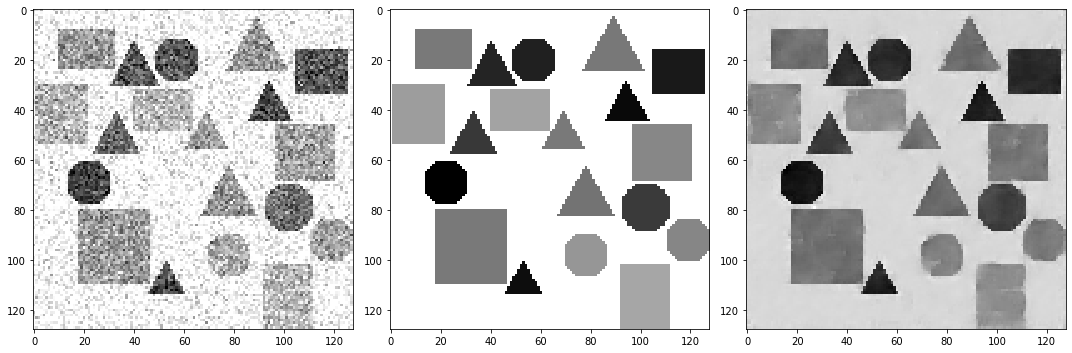

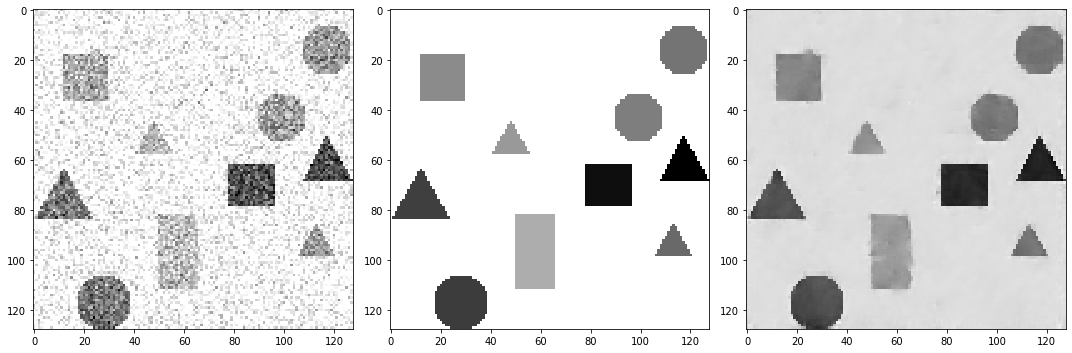

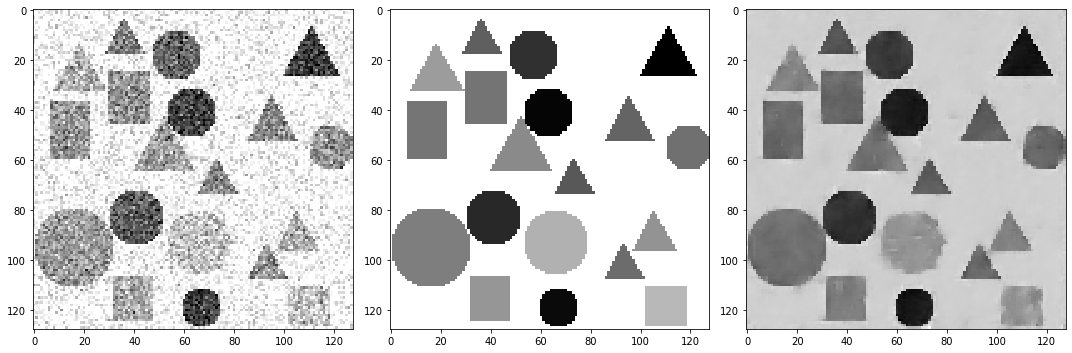

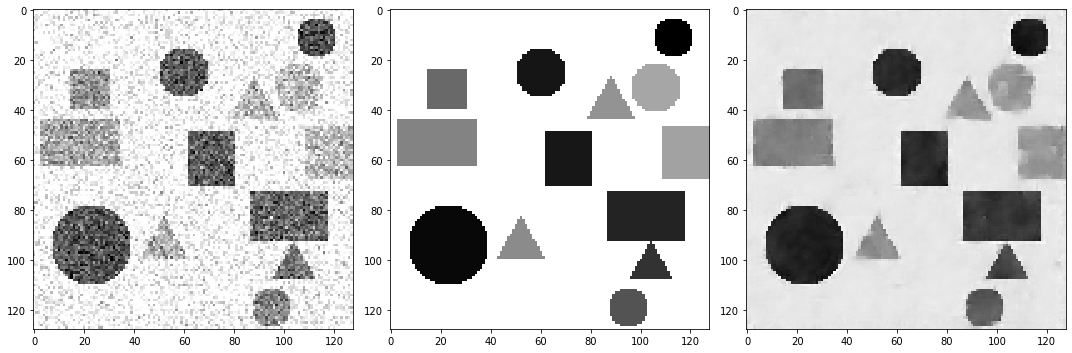

In [7]:
for _idx in range(ns_img_test.shape[0])[:4]:
    dn_img = trained_dn_mdl.predict(ns_img_test[_idx:_idx+1,:,:,np.newaxis])
    
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.imshow(ns_img_test[_idx], cmap='gray')
    plt.subplot(132)
    plt.imshow(gt_img_test[_idx], cmap='gray')
    plt.subplot(133)
    plt.imshow(dn_img.squeeze(), cmap='gray')
    plt.tight_layout(); plt.show(); plt.close()

## hold on here
### we will go to [https://github.com/lzhengchun/TomoGAN](https://github.com/lzhengchun/TomoGAN) to walk through 
### a more advanced model, TomoGAN for complicated real scientific images with artifacts and noise.
### but we can also try the TomoGAN with on the toy dataset but it will be a huge hammer 
### let's try to use TomoGAN for the toy dataset

In [18]:
TomoGAN4toy = tf.keras.models.load_model('./model/TomoGAN-toy.h5', )
TomoGAN4toy.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 8 16          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 2336        conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, None, None, 3 9248        conv2d_1[0][0]                   
______________________________________________________________________________________________

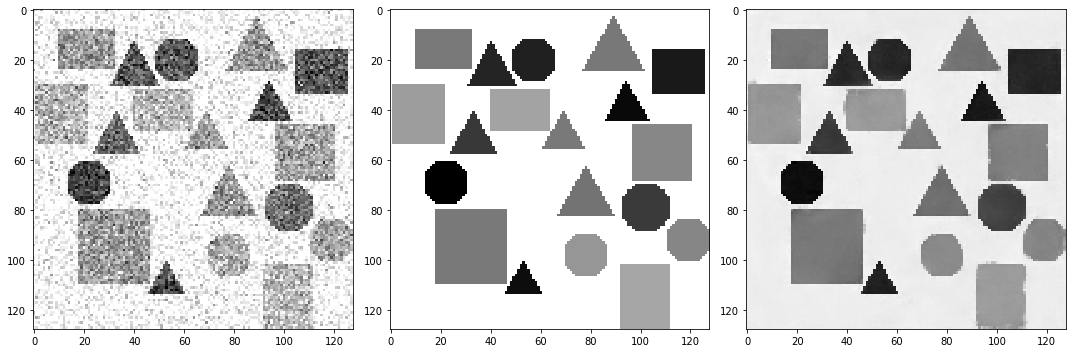

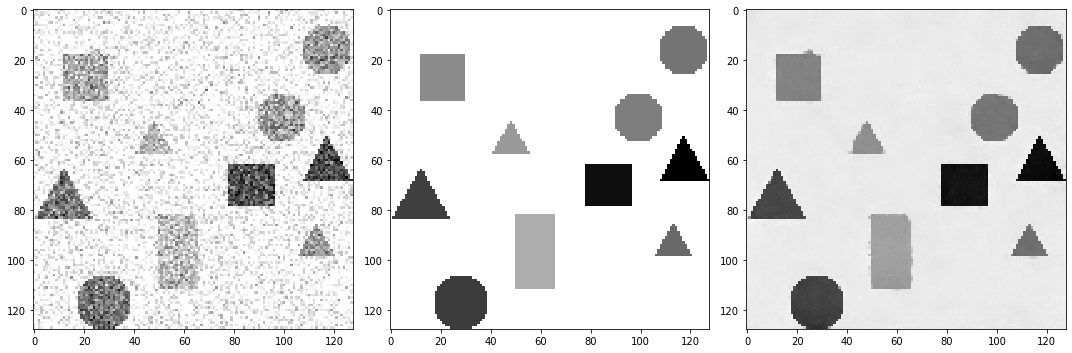

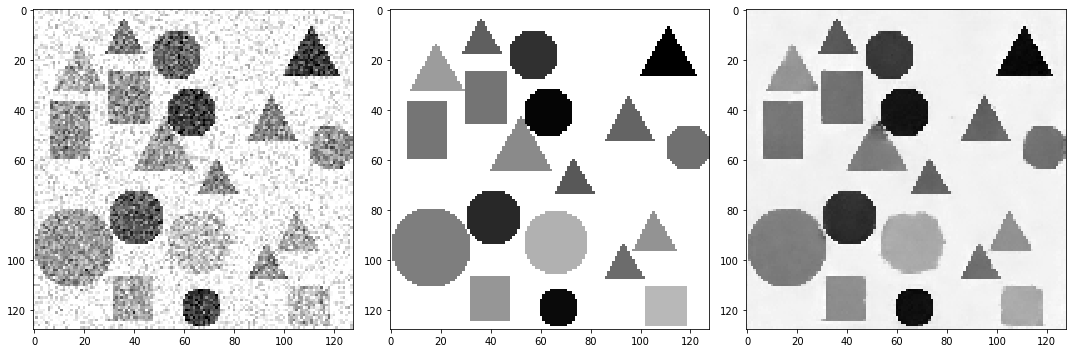

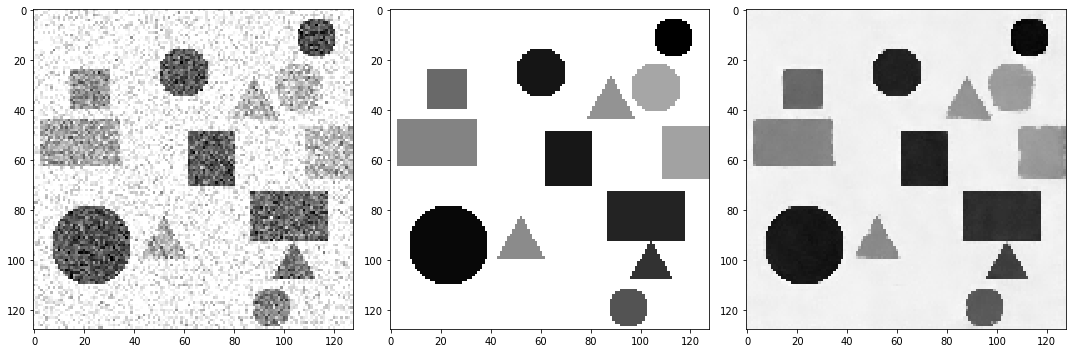

In [19]:
for _idx in range(ns_img_test.shape[0])[:4]:
    dn_img = TomoGAN4toy.predict(ns_img_test[_idx:_idx+1,:,:,np.newaxis].astype(np.float32)*255).squeeze()
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.imshow(ns_img_test[_idx], cmap='gray')
    plt.subplot(132)
    plt.imshow(gt_img_test[_idx], cmap='gray')
    plt.subplot(133)
    plt.imshow(dn_img, cmap='gray')
    plt.tight_layout(); plt.show(); plt.close()